# Loan Application Status Prediction

Problem Statement:



This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression             #classification model
from sklearn.naive_bayes import GaussianNB                      #classification model
from sklearn.tree import DecisionTreeClassifier                 #classification model
from sklearn.ensemble import RandomForestClassifier             #classification model
from sklearn.svm import SVC                                     #classification model
from sklearn.model_selection import train_test_split            #for splitting dataset into training and testing
from sklearn.metrics import accuracy_score                      #for checking model accuracy
from sklearn.metrics import roc_auc_score                       #for checking model accuracy
from sklearn.metrics import confusion_matrix, classification_report      #for checking model accuracy
from sklearn.model_selection import cross_val_score  
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('loan_status_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#checking the shape of dataset
df.shape


(614, 13)

# EDA

In [5]:
#checking for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

there are some null values present in columns but we will see them in data preprocessing part 

In [6]:
#checking the types of column
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
#checking the target class count 
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
#checking the unique values in each columns of data set
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [9]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [11]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [13]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [14]:
#now handelling the null values 
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Conversion float into int

In [18]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int')
df['Credit_History']=df['Credit_History'].astype('int')
df['CoapplicantIncome']=df['CoapplicantIncome'].astype('int')

In [19]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int32
LoanAmount           float64
Loan_Amount_Term       int32
Credit_History         int32
Property_Area         object
Loan_Status           object
dtype: object

In [20]:
#handling invalid data
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [21]:
df['Dependents'].replace('3+','3',inplace=True)

In [22]:
df['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [23]:
df['Dependents']=df['Dependents'].astype('int')

# Data Visualizaton:

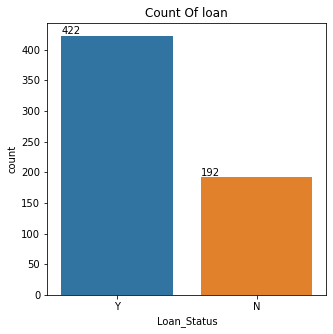

In [24]:
fig=plt.figure(figsize=(5,5))
ax=sns.countplot(df['Loan_Status'])
ax.set_title("Count Of loan")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))
    
plt.show()

Loan Approved =422


Loan Rejected =192

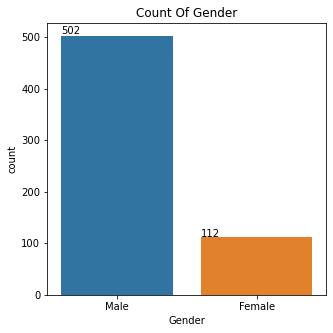

In [25]:
fig=plt.figure(figsize=(5,5))
ax=sns.countplot(df['Gender'])
ax.set_title("Count Of Gender")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))
    
plt.show()

male applicants=502


female applicant=112

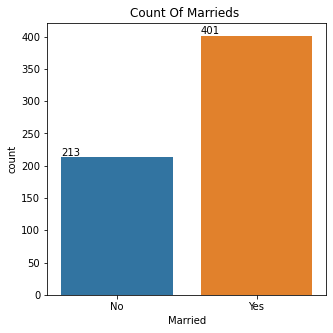

In [26]:
fig=plt.figure(figsize=(5,5))
ax=sns.countplot(df['Married'])
ax.set_title("Count Of Marrieds ")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))
    
plt.show()

213 unmarried


401 married

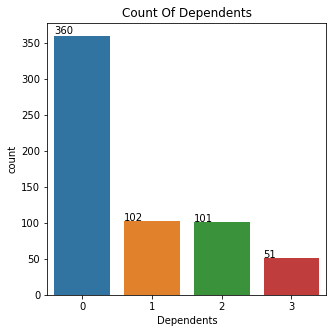

In [27]:
fig=plt.figure(figsize=(5,5))
ax=sns.countplot(df['Dependents'])
ax.set_title("Count Of Dependents")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))
    
plt.show()

['Graduate' 'Not Graduate']


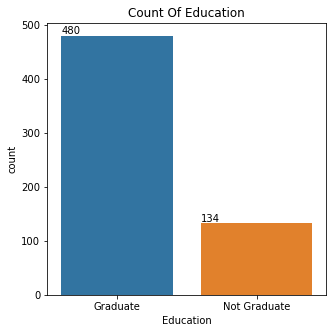

In [28]:
print(df['Education'].unique())
fig=plt.figure(figsize=(5,5))
ax=sns.countplot(df['Education'])
ax.set_title("Count Of Education")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))
    
plt.show()

480 graduate


134 ungraduate

['No' 'Yes']


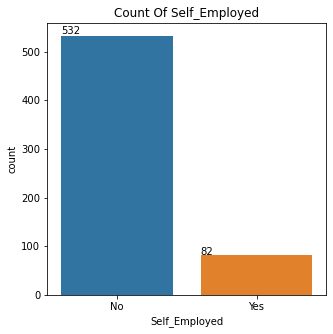

In [29]:
print(df['Self_Employed'].unique())
fig=plt.figure(figsize=(5,5))
ax=sns.countplot(df['Self_Employed'])
ax.set_title("Count Of Self_Employed")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))
    
plt.show()

532 self employed


82 employed

[360 120 240 180  60 300 480  36  84  12]


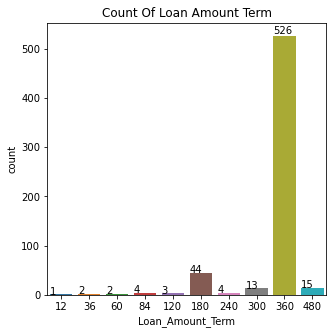

In [30]:
print(df['Loan_Amount_Term'].unique())
fig=plt.figure(figsize=(5,5))
ax=sns.countplot(df['Loan_Amount_Term'])
ax.set_title("Count Of Loan Amount Term")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))
    
plt.show()

[1 0]


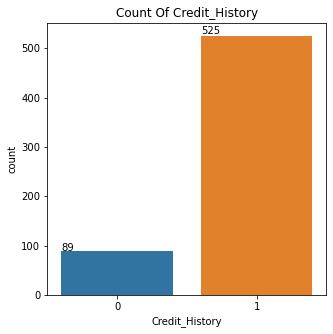

In [31]:
print(df['Credit_History'].unique())


fig=plt.figure(figsize=(5,5))
ax=sns.countplot(df['Credit_History'])
ax.set_title("Count Of Credit_History")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))
    
plt.show()

['Urban' 'Rural' 'Semiurban']


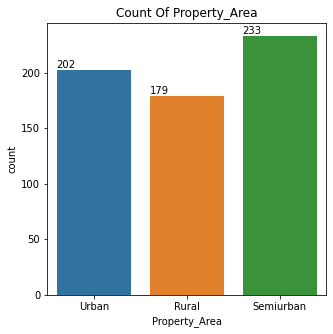

In [32]:
print(df['Property_Area'].unique())


fig=plt.figure(figsize=(5,5))
ax=sns.countplot(df['Property_Area'])
ax.set_title("Count Of Property_Area")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))
    
plt.show()

['Male' 'Female']


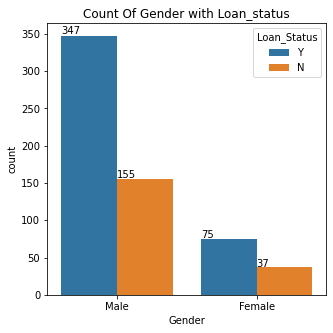

In [33]:
print(df['Gender'].unique())


fig=plt.figure(figsize=(5,5))
ax=sns.countplot(df['Gender'],hue=df['Loan_Status'])
ax.set_title("Count Of Gender with Loan_status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))
    
plt.show()

out of 512 males , 347 approved and 155 rejected 



out of 112 females , 75 approved and 37 rejected 

['No' 'Yes']


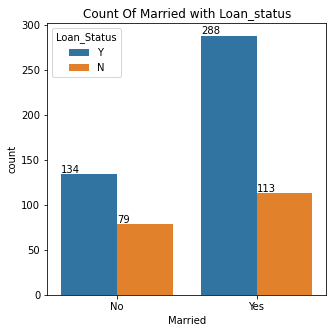

In [34]:
print(df['Married'].unique())


fig=plt.figure(figsize=(5,5))
ax=sns.countplot(df['Married'],hue=df['Loan_Status'])
ax.set_title("Count Of Married with Loan_status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))
    
plt.show()

out of 401 married, 288 approved and 113 rejected 


out of 213 unmarried,134 approved and 79 rejected

[0 1 2 3]


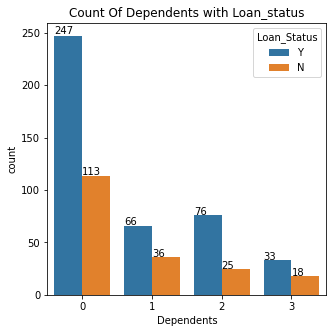

In [35]:
print(df['Dependents'].unique())


fig=plt.figure(figsize=(5,5))
ax=sns.countplot(df['Dependents'],hue=df['Loan_Status'])
ax.set_title("Count Of Dependents with Loan_status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))
    
plt.show()

['Graduate' 'Not Graduate']


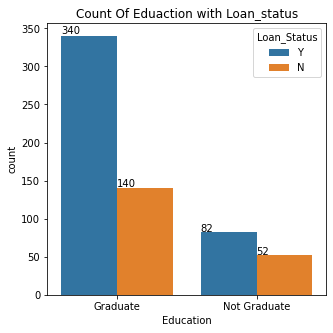

In [36]:
print(df['Education'].unique())


fig=plt.figure(figsize=(5,5))
ax=sns.countplot(df['Education'],hue=df['Loan_Status'])
ax.set_title("Count Of Eduaction with Loan_status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))
    
plt.show()

['No' 'Yes']


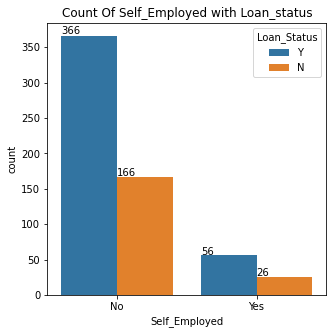

In [37]:
print(df['Self_Employed'].unique())


fig=plt.figure(figsize=(5,5))
ax=sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])
ax.set_title("Count Of Self_Employed with Loan_status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))
    
plt.show()

[1 0]


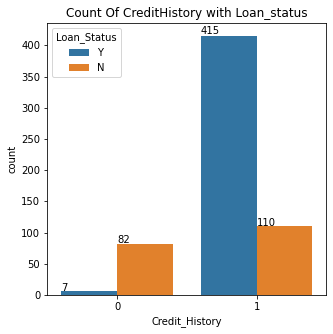

In [38]:
print(df['Credit_History'].unique())


fig=plt.figure(figsize=(5,5))
ax=sns.countplot(df['Credit_History'],hue=df['Loan_Status'])
ax.set_title("Count Of CreditHistory with Loan_status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))
    
plt.show()

['Urban' 'Rural' 'Semiurban']


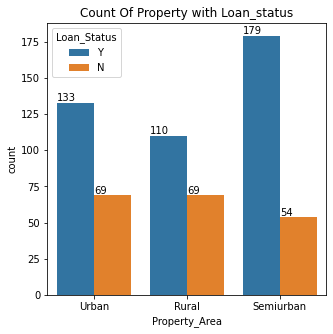

In [39]:
print(df['Property_Area'].unique())


fig=plt.figure(figsize=(5,5))
ax=sns.countplot(df['Property_Area'],hue=df['Loan_Status'])
ax.set_title("Count Of Property with Loan_status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))
    
plt.show()

# Distribution of numerical features

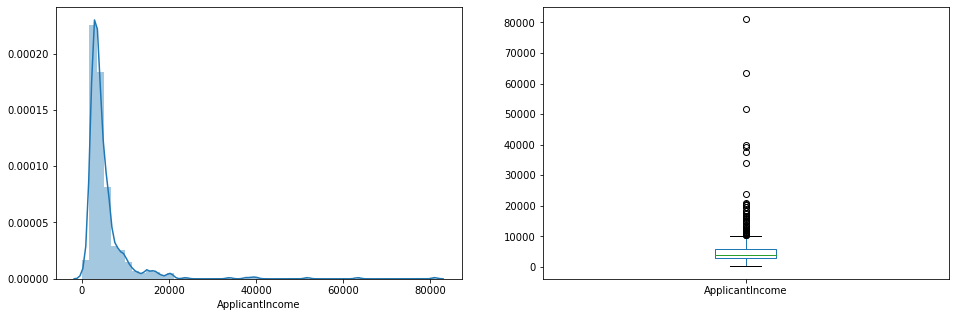

In [40]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df["ApplicantIncome"])


plt.subplot(122)
df["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

most of the data is left skewed 

and box plot shows the most of the data is outliers 

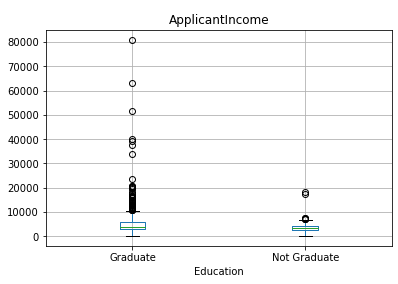

In [41]:
df.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle(" ")
plt.show()

there are some outliers present in above plot

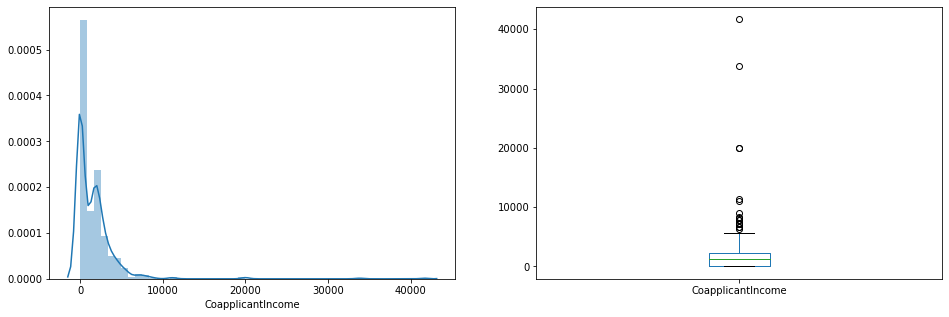

In [42]:
plt.subplot(121)
sns.distplot(df["CoapplicantIncome"])

plt.subplot(122)
df["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

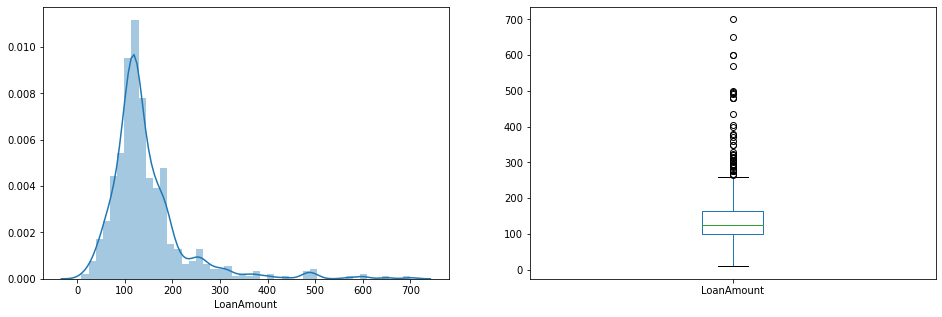

In [43]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['LoanAmount'])

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

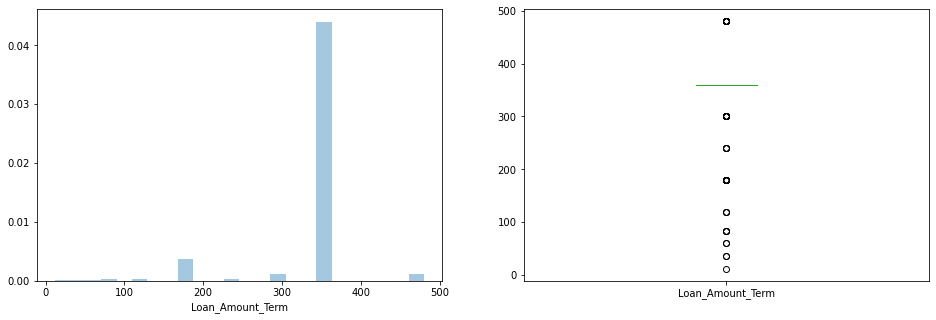

In [44]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Loan_Amount_Term'])

plt.subplot(122)
df['Loan_Amount_Term'].plot.box(figsize=(16,5))

plt.show()

In [45]:
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

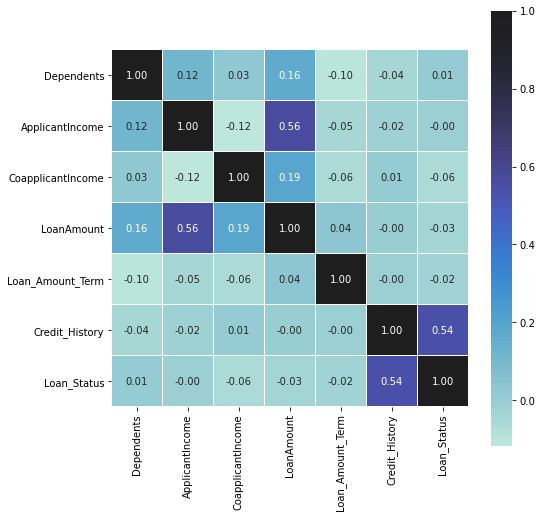

In [46]:
mat=df.corr()
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(mat,square=True,annot=True,center=True,fmt='.2f',linewidth=0.2)
plt.show()

there are some correlated variable i.e ApplicantIncome-LoanAmount and Credit_History-Loan_Status



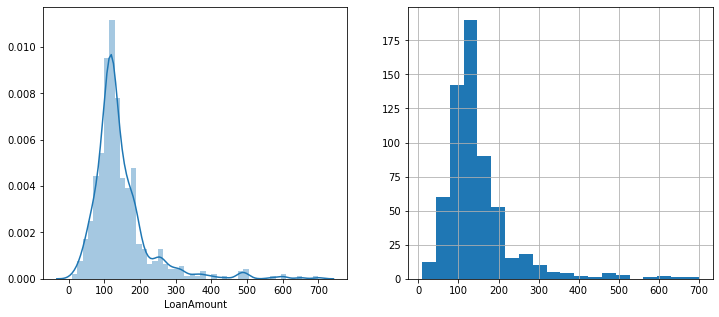

In [47]:
#Loan Amount:

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df["LoanAmount"])
plt.subplot(122)
df['LoanAmount'].hist(bins=20)
plt.show()

In [48]:
#log transformation Of Loan Amount feature:

df['LoanAmount_log']=np.log(df['LoanAmount'])

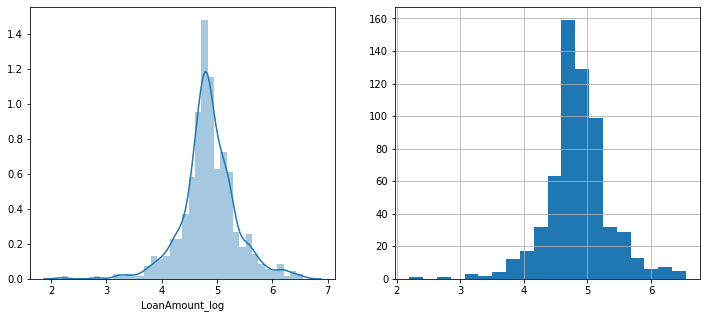

In [49]:
#Loan Amount:

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df["LoanAmount_log"])
plt.subplot(122)
df['LoanAmount_log'].hist(bins=20)
plt.show()

Now the data is transformed properly and distribution is normal

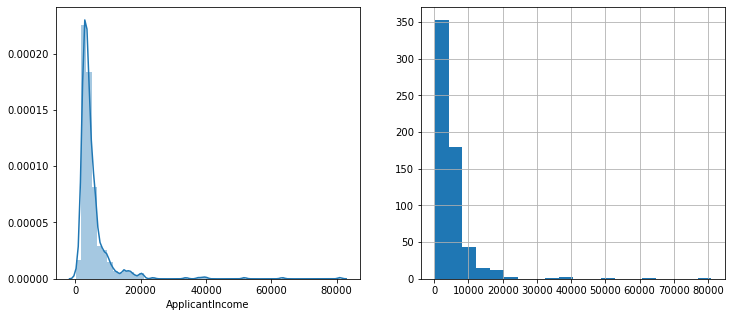

In [50]:
#Applicant Income:

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df["ApplicantIncome"])
plt.subplot(122)
df['ApplicantIncome'].hist(bins=20)
plt.show()

In [51]:
#applying Log transformation in Applicant Income:


df['ApplicantIncome_log']=np.log(df['ApplicantIncome'])

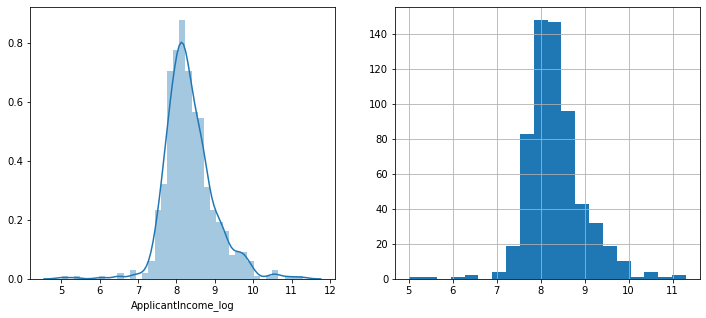

In [52]:
#Applicant Income after Log Transformation

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df["ApplicantIncome_log"])
plt.subplot(122)
df['ApplicantIncome_log'].hist(bins=20)
plt.show()

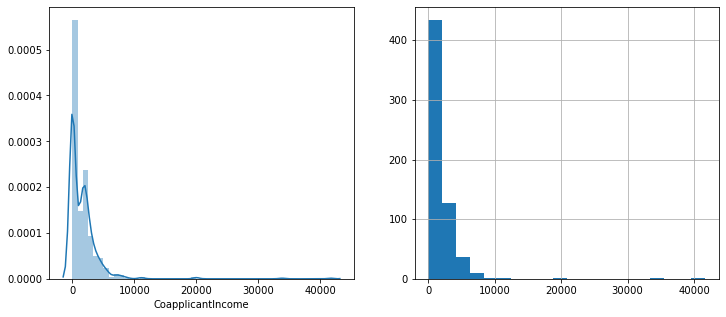

In [53]:
#Coapplicant Income:


plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df["CoapplicantIncome"])
plt.subplot(122)
df['CoapplicantIncome'].hist(bins=20)
plt.show()

In [54]:
df['Coapplicant_log']=np.log(np.log(df['CoapplicantIncome']))

In [55]:
df['Coapplicant_log'].isnull().sum

<bound method Series.sum of 0       True
1      False
2       True
3      False
4       True
       ...  
609     True
610     True
611    False
612     True
613     True
Name: Coapplicant_log, Length: 614, dtype: bool>

In [56]:
df['CoapplicantIncome_log']=df['Coapplicant_log'].fillna(df['Coapplicant_log'].median())

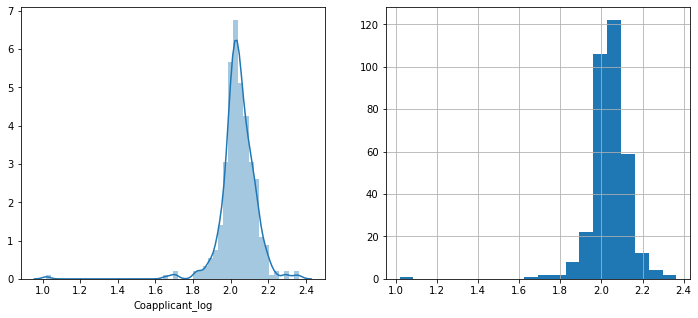

In [57]:
#CoApplicant Income after log transformation:

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df["Coapplicant_log"])
plt.subplot(122)
df['Coapplicant_log'].hist(bins=20)
plt.show()

In [58]:
#now Total income=ApplicantIncome+CoapplicantIncome
df["TotalIncome"]=df["ApplicantIncome"]+df["CoapplicantIncome"]

In [59]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,Coapplicant_log,CoapplicantIncome_log,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0,120.0,360,1,Urban,1,4.787492,8.674026,NaN,2.038703,5849
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360,1,Rural,0,4.852030,8.430109,1.990411,1.990411,6091
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360,1,Urban,1,4.189655,8.006368,NaN,2.038703,3000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360,1,Urban,1,4.787492,7.856707,2.049700,2.049700,4941
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360,1,Urban,1,4.948760,8.699515,NaN,2.038703,6000


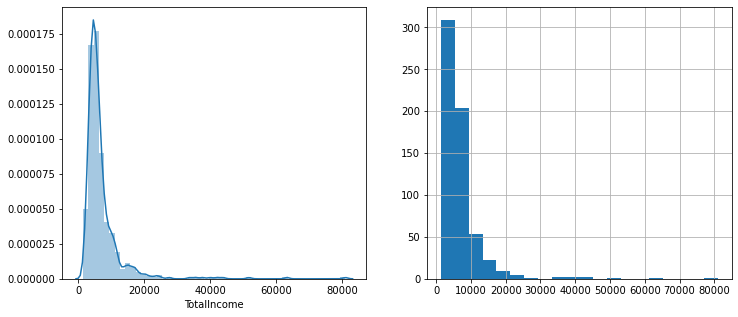

In [60]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df["TotalIncome"])
plt.subplot(122)
df['TotalIncome'].hist(bins=20)
plt.show()

In [61]:
#appliying log transformation in TotalIncone
df["TotalIncome_log"]=np.log(df["TotalIncome"])

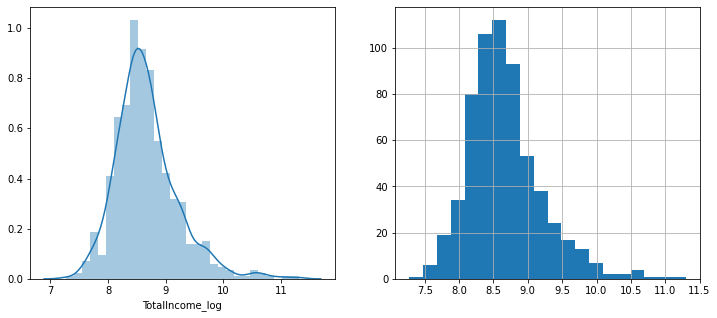

In [62]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df["TotalIncome_log"])
plt.subplot(122)
df['TotalIncome_log'].hist(bins=20)
plt.show()

In [63]:
#EMI Feature
df["EMI"]=df["LoanAmount"]/df["Loan_Amount_Term"]

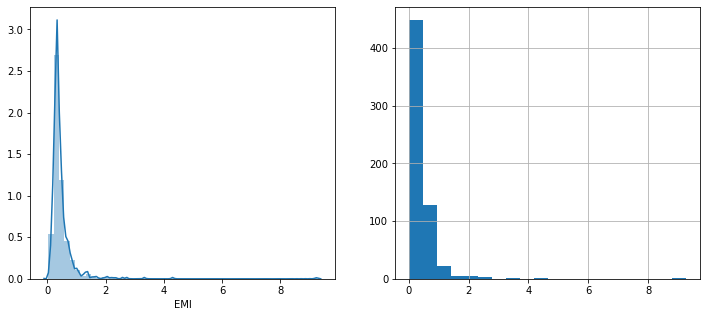

In [64]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df["EMI"])
plt.subplot(122)
df['EMI'].hist(bins=20)
plt.show()

In [65]:
df['EMI_log']=np.log(df["EMI"])

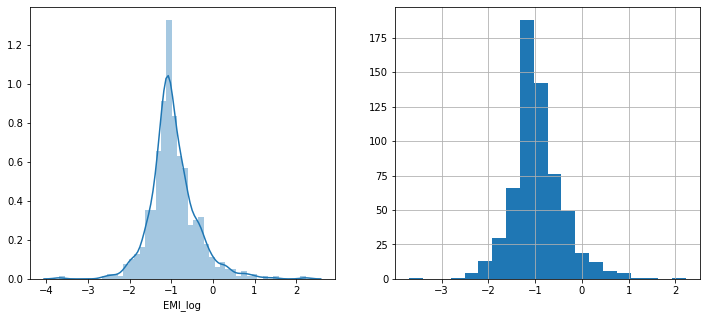

In [66]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df["EMI_log"])
plt.subplot(122)
df['EMI_log'].hist(bins=20)
plt.show()

In [67]:
df["Balance_Income"]=df["TotalIncome"]-df["EMI"]*1000

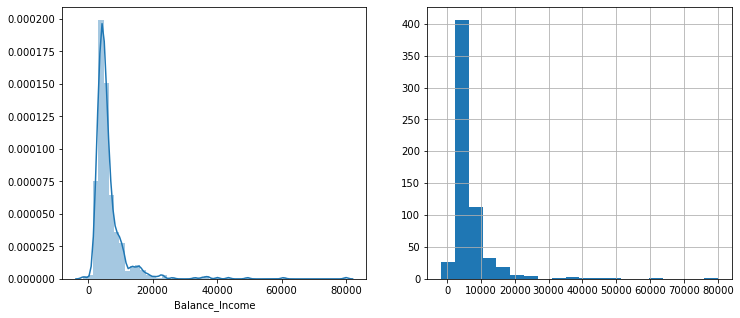

In [68]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df["Balance_Income"])
plt.subplot(122)
df['Balance_Income'].hist(bins=20)
plt.show()

In [69]:
#log gtransformation
df["Balance_Income_log"]=np.log(np.log(df["Balance_Income"]))

In [70]:
df['Balance_Income_log'].isnull().sum()

2

In [71]:
df['Balance_Income_log']=df["Balance_Income_log"].fillna(df['Balance_Income_log'].mode())

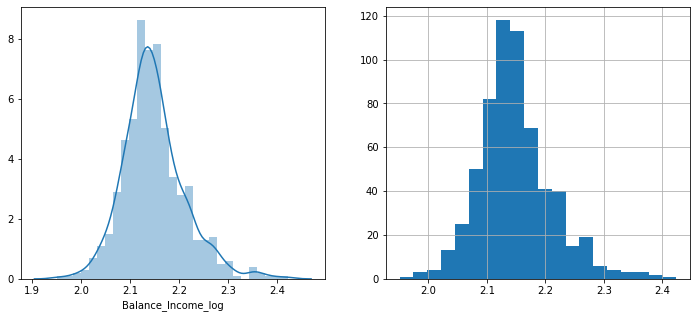

In [72]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df["Balance_Income_log"])
plt.subplot(122)
df['Balance_Income_log'].hist(bins=20)
plt.show()

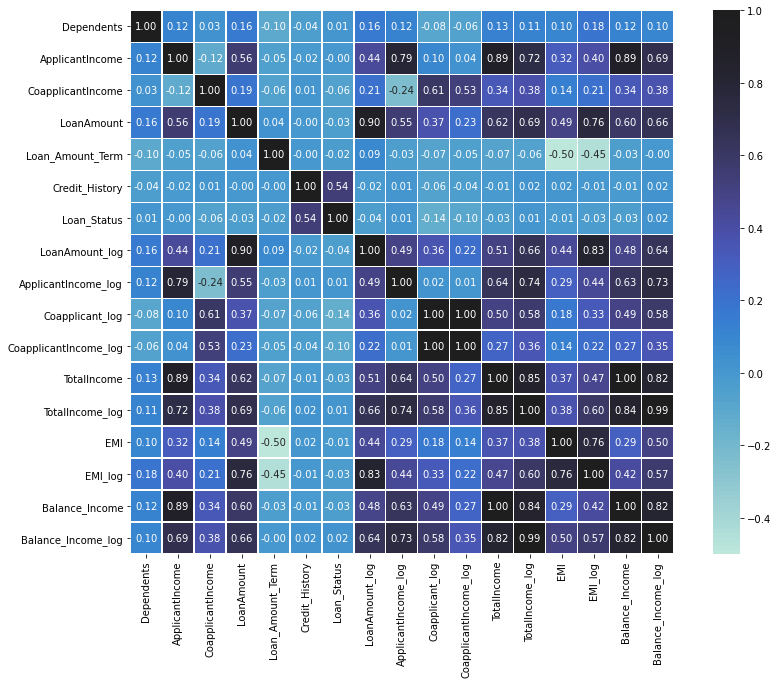

In [73]:
mat=df.corr()
f,ax=plt.subplots(figsize=(14,10))
sns.heatmap(mat,square=True,annot=True,center=True,fmt='.2f',linewidth=0.2)
plt.show()

# Model Building with Log Feature:

In [74]:
df1=df.copy()

In [75]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,LoanAmount_log,ApplicantIncome_log,Coapplicant_log,CoapplicantIncome_log,TotalIncome,TotalIncome_log,EMI,EMI_log,Balance_Income,Balance_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0,120.0,360,...,4.787492,8.674026,NaN,2.038703,5849,8.674026,0.333333,-1.098612,5515.666667,2.153545
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360,...,4.852030,8.430109,1.990411,1.990411,6091,8.714568,0.355556,-1.034074,5735.444444,2.158070
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360,...,4.189655,8.006368,NaN,2.038703,3000,8.006368,0.183333,-1.696449,2816.666667,2.072330
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360,...,4.787492,7.856707,2.049700,2.049700,4941,8.505323,0.333333,-1.098612,4607.666667,2.132446
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360,...,4.948760,8.699515,NaN,2.038703,6000,8.699515,0.391667,-0.937344,5608.333333,2.155477


# Converting Categorical feature into numeric:
    

In [76]:
df1['Gender']=df1['Gender'].map({'Male':1,'Female':0})
df1['Married']=df1['Married'].map({'Yes':1,'No':0})
df1['Education']=df1['Education'].map({'Graduate':1,'Not Graduate':0})
df1['Self_Employed']=df1['Self_Employed'].map({'Yes':1,'No':0})
df1['Property_Area']=df1['Property_Area'].map({'Urban':1,'Rural':2,'Semiurban':3})



In [77]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,LoanAmount_log,ApplicantIncome_log,Coapplicant_log,CoapplicantIncome_log,TotalIncome,TotalIncome_log,EMI,EMI_log,Balance_Income,Balance_Income_log
0,LP001002,1,0,0,1,0,5849,0,120.0,360,...,4.787492,8.674026,NaN,2.038703,5849,8.674026,0.333333,-1.098612,5515.666667,2.153545
1,LP001003,1,1,1,1,0,4583,1508,128.0,360,...,4.852030,8.430109,1.990411,1.990411,6091,8.714568,0.355556,-1.034074,5735.444444,2.158070
2,LP001005,1,1,0,1,1,3000,0,66.0,360,...,4.189655,8.006368,NaN,2.038703,3000,8.006368,0.183333,-1.696449,2816.666667,2.072330
3,LP001006,1,1,0,0,0,2583,2358,120.0,360,...,4.787492,7.856707,2.049700,2.049700,4941,8.505323,0.333333,-1.098612,4607.666667,2.132446
4,LP001008,1,0,0,1,0,6000,0,141.0,360,...,4.948760,8.699515,NaN,2.038703,6000,8.699515,0.391667,-0.937344,5608.333333,2.155477


In [78]:
#dropping column which have no use
df1=df1.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','Coapplicant_log','LoanAmount','TotalIncome','TotalIncome_log','EMI','EMI_log','Balance_Income','Balance_Income_log'],axis=1)

In [79]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log
0,1,0,0,1,0,360,1,1,1,4.787492,8.674026,2.038703
1,1,1,1,1,0,360,1,2,0,4.852030,8.430109,1.990411
2,1,1,0,1,1,360,1,1,1,4.189655,8.006368,2.038703
3,1,1,0,0,0,360,1,1,1,4.787492,7.856707,2.049700
4,1,0,0,1,0,360,1,1,1,4.948760,8.699515,2.038703


Seprating the feature and labels

In [80]:
x=df1.drop(['Loan_Status'],axis=1)
y=df1['Loan_Status']

In [81]:
maxAccu = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Max Accuracy obtained is', maxAccu, 'on Random State', maxRS)

Max Accuracy obtained is 0.8756756756756757 on Random State 389


In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 389)


In [84]:
LR = LogisticRegression()
nb = GaussianNB()
DTC = DecisionTreeClassifier()
rf = RandomForestClassifier()
models = [LR, nb, DTC, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (accuracy_score(y_test, pred))
    print (confusion_matrix(y_test, pred))
    print (classification_report(y_test, pred))

LogisticRegression()
0.8756756756756757
[[ 27  22]
 [  1 135]]
              precision    recall  f1-score   support

           0       0.96      0.55      0.70        49
           1       0.86      0.99      0.92       136

    accuracy                           0.88       185
   macro avg       0.91      0.77      0.81       185
weighted avg       0.89      0.88      0.86       185

GaussianNB()
0.8756756756756757
[[ 27  22]
 [  1 135]]
              precision    recall  f1-score   support

           0       0.96      0.55      0.70        49
           1       0.86      0.99      0.92       136

    accuracy                           0.88       185
   macro avg       0.91      0.77      0.81       185
weighted avg       0.89      0.88      0.86       185

DecisionTreeClassifier()
0.772972972972973
[[ 34  15]
 [ 27 109]]
              precision    recall  f1-score   support

           0       0.56      0.69      0.62        49
           1       0.88      0.80      0.84       136

In [85]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LogisticRegression()  model is : 0.8061975209916034
 
Cross Validation Score for  GaussianNB()  model is : 0.8013194722111155
 
Cross Validation Score for  DecisionTreeClassifier()  model is : 0.7133679861388778
 
Cross Validation Score for  RandomForestClassifier()  model is : 0.79156337465014
 


# Hyperparameter Tunning

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid={'n_estimators':[200,500],
           'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [89]:
rf=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3)
rf.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [90]:
rf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [92]:
rf1=RandomForestClassifier(random_state=389,max_features='auto',n_estimators=200,max_depth=4,criterion='gini')
rf1.fit(x_train,y_train)
predrf1=rf1.predict(x_test)
print(accuracy_score(y_test,predrf1))
print(confusion_matrix(y_test,predrf1))
print(classification_report(y_test,predrf1))

0.8756756756756757
[[ 27  22]
 [  1 135]]
              precision    recall  f1-score   support

           0       0.96      0.55      0.70        49
           1       0.86      0.99      0.92       136

    accuracy                           0.88       185
   macro avg       0.91      0.77      0.81       185
weighted avg       0.89      0.88      0.86       185



In [93]:
cv_score=cross_val_score(rf1,x,y,cv=5)
print('Cross validation score',rf1,'model is :',cv_score.mean())

Cross validation score RandomForestClassifier(max_depth=4, n_estimators=200, random_state=389) model is : 0.8061975209916034


In [94]:
import pickle
filename='LoanStatusRf.pkl'
pickle.dump(rf1,open(filename,'wb'))

In [96]:
l_model=pickle.load(open('LoanStatusRf.pkl','rb'))
result=l_model.score(x_test,y_test)
print(result
     )

0.8756756756756757
